# CLAMP Pre-processed Discharge Summary Notes Data Exploration
Notebook for loading and running some statistical analysis on the distribution of CUIs as extracted by CLAMP

In [1]:
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
from utils import extract_umls_cuis, generate_cui_translation_dictionary
import json
from collections import Counter
import matplotlib

In [2]:
#sidcuis = extract_umls_cuis(save=False)
with open("sids_to_clamp_cuis.json",'r') as infile:
    sidcuis = json.load(infile)

In [3]:
cuicounter = Counter()
for i in sidcuis:
    cuicounter.update(sidcuis[i]['cuis'])
    

In [4]:
#cuitranslate = generate_cui_translation_dictionary(save = False)
with open("cuitranslate.json",'r') as infile:
    cuitranslate = json.load(infile)

In [5]:
for i in cuicounter.most_common(10):
    print(f'{i[1]}\t{i[0]}\t{cuitranslate[i[0]]}')

47225	C0020538	Hypertensive disease
38491	C0038454	Cerebrovascular accident
35182	C0004057	aspirin
34977	C0005823	Blood Pressure
20866	C0013227	Pharmaceutical Preparations
18749	C0020473	Hyperlipidemia
18635	C0030193	Pain
17142	C0065374	lisinopril
15612	C0019602	histidine
15029	C0007787	Transient Ischemic Attack


In [6]:
uniq_cuicounter = Counter()
for i in sidcuis:
    uniq_cuicounter.update(np.unique(sidcuis[i]['cuis']))

In [7]:
#CAD gene == Coronary Artery Disease
#Histidine == NLP error on "his"
#PT  == bad NLP error on "PT"
for i in uniq_cuicounter.most_common(50):
    print(f'{i[1]}\t{i[0]}\t{cuitranslate[i[0]]}')

20798	C0020538	Hypertensive disease
17660	C0004057	aspirin
16445	C0005823	Blood Pressure
14689	C0038454	Cerebrovascular accident
11774	C0013227	Pharmaceutical Preparations
11732	C0020473	Hyperlipidemia
11287	C0030193	Pain
10796	C3845697	Medical Outpatient
10195	C0065374	lisinopril
9483	C0019602	histidine
9142	C0202691	CAT scan of head
9052	C0286651	atorvastatin
8567	C0015967	Fever
8498	C0286650	atorvastatin calcium
8298	C0008031	Chest Pain
8217	C0024485	Magnetic Resonance Imaging
8066	C0013404	Dyspnea
7745	C0000970	acetaminophen
7607	C0007787	Transient Ischemic Attack
7445	C1413078	CAD gene
7060	C0011849	Diabetes Mellitus
6925	C3714552	Weakness
6750	C0012833	Dizziness
6692	C1718097	New medications
6601	C0009806	Constipation
6572	C0022877	Laboratory
6465	C0004238	Atrial Fibrillation
6209	C0007282	Carotid Stenosis
6140	C0040405	X-Ray Computed Tomography
5981	C0087111	Therapeutic procedure
5913	C1457887	Symptoms
5887	C0039476	Temperature
5862	C0008377	cholesterol
5790	C0412675	Magnetic re

In [8]:
for i in cuicounter.most_common()[-10:]:
    print(f'{i[1]}\t{i[0]}\t{cuitranslate[i[0]]}')

1	C2029599	external swelling of right frontal region of head
1	C2048111	implantable cardioverter-defibrillator evaluation last insertion date
1	C0486984	IgA subclass 1/IgA.total
1	C4746321	Brief communication technology-based service, e.g. virtual check-in, by a physician or other qualified health care professional who can report evaluation and management services, provided to an established patient, not originating from a related e/m service provided within the previous 7 days nor leading to an e/m service or procedure within the next 24 hours or soonest available appointment; 5-10 minutes of medical discussion
1	C0271029	Postinflammatory chorioretinal scar
1	C3258850	Mononuclear+Mesothelial cells/100 leukocytes:NFr:Pt:Body fld:Qn:Manual count
1	C4066268	body fluid appearance
1	C1254910	CSF Paraneoplastic Antibodies Test
1	C1446041	Serum protein profile
1	C0572263	Omeprazole overdose


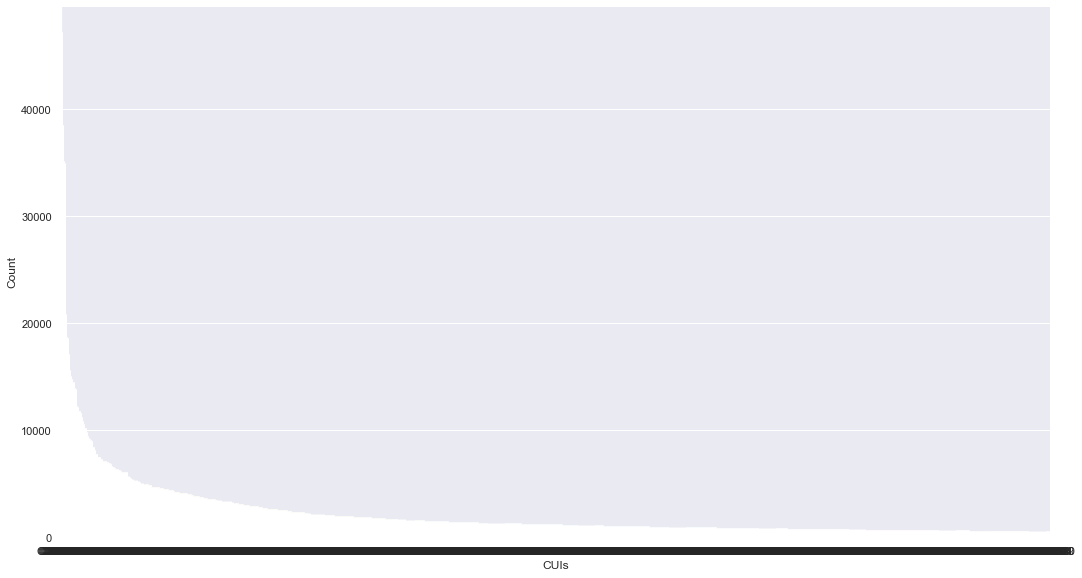

In [11]:
#sns.catplot(data=countplotdf, x='CUIs', kind='bar', y='Count', height=8, aspect=15/8)

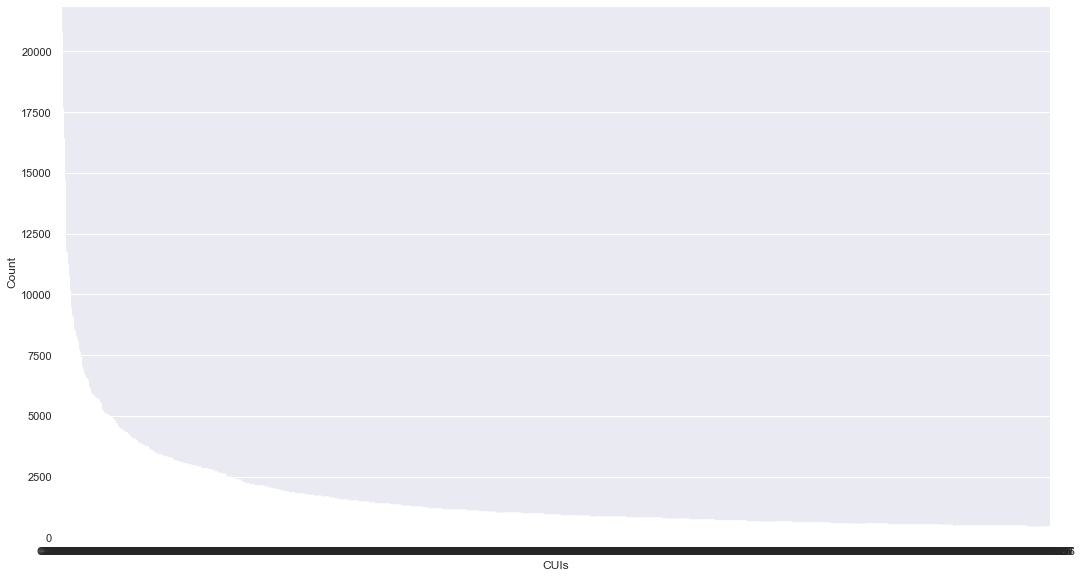

In [12]:
#sns.catplot(data=uniqcountplotdf, x='CUIs', kind='bar', y='Count', height=8, aspect=15/8)

In [9]:
len(cuicounter)

111303

In [10]:
#A1C ---> US Military enlisted E3
#Structure of subparietal sulcus --> nlp error
for i in uniq_cuicounter.most_common(150)[-50:]:
    print(f'{i[1]}\t{i[0]}\t{cuitranslate[i[0]]}')

3410	C0034642	Rales
3403	C0011991	Diarrhea
3380	C2317067	Medication Reconciliation
3364	C0034991	Rehabilitation therapy
3355	C0369183	Erythrocyte Mean Corpuscular Hemoglobin Test
3350	C1561643	Chronic Kidney Diseases
3342	C0302148	Blood Clot
3313	C4521595	US Military enlisted E3
3311	C0018808	Heart murmur
3308	C0023823	Low-Density Lipoproteins
3294	C0011860	Diabetes Mellitus, Non-Insulin-Dependent
3273	C0043100	Weight
3272	C0722138	Non-Aspirin
3174	C0015230	Exanthema
3170	C0427460	Red cell distribution width determination
3168	C0582103	Medical Examination
3164	C0021796	Internship, Nonmedical
3158	C0228216	Structure of subparietal sulcus
3157	C0013362	Dysarthria
3139	C0070166	clopidogrel
3115	C0340569	Internal Carotid Artery Stenosis
3109	C0010055	Coronary Artery Bypass Surgery
3086	C0020261	hydrochlorothiazide
3076	C1080058	This (eukaryote)
3072	C0006675	calcium
3062	C0010294	creatinine
3039	C0751956	Acute Cerebrovascular Accidents
3035	C0030252	Palpitations
3031	C0039451	Telemetry
302

In [11]:
#CLC gene  ===> community living center
for i in uniq_cuicounter.most_common(250)[-50:]:
    print(f'{i[1]}\t{i[0]}\t{cuitranslate[i[0]]}')

2145	C3813556	Cancer/Testis Antigen
2141	C1291218	Carbonyldiamide
2140	C0042029	Urinary tract infection
2138	C0032483	polyethylene glycols
2131	C0200665	Platelet mean volume determination (procedure)
2123	C0442732	Vital (qualifier value)
2115	C0277797	Apyrexial
2093	C1551055	Tesla - unit
2088	C0149871	Deep Vein Thrombosis
2078	C0184661	Interventional procedure
2077	C4086564	Mass Effect
2049	C0038436	Post-Traumatic Stress Disorder
2046	C0002455	American Cancer Society
2030	C0427066	Weakness of distal arms and legs
2027	C2609264	Color vision change
2011	C1261287	Stenosis
2003	C1332765	CLC gene
1994	C3247331	ACCU-CHEK AVIVA PLUS (GLUCOSE) TEST STRIP
1982	C0232200	Gallop rhythm
1970	C0001924	Albumins
1960	C0016410	folic acid
1946	C4086580	Midline Shift
1940	C0311170	Cholesterol-lowering diet (finding)
1933	C0948008	Ischemic stroke
1905	C0241981	Impairment of balance
1904	C0003232	Antibiotics
1901	C0023518	Leukocytosis
1899	C0025598	metformin
1891	C0741988	carotid ultrasound doppler
1877	C0

In [16]:
#Generate a slice of not too common and not too uncommon CUIs
cuistoinclude = dict()
_ = 0
for i in uniq_cuicounter.most_common():
    if i[1] > 5000:
        pass
    elif i[1] < 20:
        pass
    else:
        if i[0][0] == 'C': #get rid of noncuis that leaked in; TODO: figure out why there are non cuis here
            cuistoinclude[i[0]] = _
            _ += 1
print(len(cuistoinclude))

11580


In [18]:
rowstomake = 0
sidstoinclude = dict()
for sid in sidcuis:
    anythingtokeep = False
    for cui in sidcuis[sid]['cuis']:
        if cui in cuistoinclude:
            anythingtokeep=True
            break
    if anythingtokeep:
        sidstoinclude[sid] = rowstomake
        rowstomake += 1
columnstomake = len(cuistoinclude)

tobefilled = np.zeros([rowstomake, columnstomake], dtype=np.uint8)

print(rowstomake, columnstomake)

29836 11580


In [19]:
for sid in sidcuis:
    for cui in sidcuis[sid]['cuis']:
        if cui in cuistoinclude:
            tobefilled[sidstoinclude[sid], cuistoinclude[cui]] = 1

In [30]:
1 - (np.count_nonzero(tobefilled) / float(tobefilled.size))

0.9938357291593585

In [28]:
len(sidcuis)

29865

In [32]:
import umap

ModuleNotFoundError: No module named 'umap'

In [33]:
np.save('onehotdocbycui20to5k.npy', tobefilled)

In [35]:
with open('onehotsidtorowdict.json','w') as outfile:
    json.dump(sidstoinclude, outfile)
    
with open("onehotcuitocolumndict.json","w") as outfile:
    json.dump(cuistoinclude, outfile)